In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import print_function
import os
import sys
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')
#os.chdir('C:/Users/murat.ozemre/Documents/MOZEMRE-OZEL/Doktora/2017 Tez/Veri Analizi/Ver 3 Tez Izleme Calısmaları')

In [4]:
from sklearn import metrics
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

statsmodels: 0.8.0


In [5]:
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'12-13 12:41'

In [6]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [8]:
#Scaler_Type_Options = ['Normalizer', 'MinMaxScaler','MaxAbsScaler','RobustScaler','StandardScaler' ]
Scaler_Type_Options = [ 'MinMaxScaler' ]
Scalertype=Scaler_Type_Options[0]
Product_Type_Options = [841810,841840,841850]

In [9]:
Scalertype

'MinMaxScaler'

In [20]:
Product

841840

In [50]:
Product=Product_Type_Options[0] #841810
Exp_Country='TUR' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [51]:
MonthSeries="3"
MonthSeries_option=["1","2","3","6","12"]

In [52]:
Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)


In [53]:
def Xscaler(X,y,scalertype):

    if scalertype=="Normalizer":
        X=pd.DataFrame(Normalizer().fit_transform(X,y))
        print("normalize")
    elif scalertype=="MinMaxScaler":
        X=pd.DataFrame(MinMaxScaler().fit_transform(X,y))
        print("minmax")
    elif scalertype=="MaxAbsScaler":
        X=pd.DataFrame(MaxAbsScaler().fit_transform(X,y))
        print("maxabs")
    elif scalertype=="RobustScaler":
        X=pd.DataFrame(RobustScaler().fit_transform(X,y))
    elif scalertype=="StandardScaler":
        X=pd.DataFrame(StandardScaler().fit_transform(X,y))
    return X

Scaling Min Max and then spilt test and train according stratify to month.

In [54]:
def X_Y_scaler_train_test_Split(X,y,Z,random=42):

    values = X.values
    values = values.astype('float32')
    X_Column_X_Column_Names=X.columns
    
    scaler_X= MinMaxScaler(feature_range=(0, 1))

    scaled_value_X = scaler_X.fit_transform(values)
    scaled_value_X = pd.DataFrame(data=scaled_value_X[:,:])
    scaled_value_X.columns=X_Column_X_Column_Names
    
    values = y.values
    values = values.astype('float32')
    values = values.reshape(-1, 1)
    
    scaler_y= MinMaxScaler(feature_range=(0, 1))

    scaled_value_y = scaler_y.fit_transform(values)
    scaled_value_y = pd.DataFrame(data=scaled_value_y)

    X_train, X_test, y_train, y_test = train_test_split(scaled_value_X,scaled_value_y,test_size=0.2,random_state=42,stratify=Z['Month'])

    return X_train, X_test, y_train, y_test, scaler_X, scaler_y, scaled_value_X, scaled_value_y


In [55]:
def inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,plot_on):

    y_predict_test=y_predict_test.reshape(-1, 1)
    inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
    predictions=inv_y_predict_test

  
    inv_y_test = scaler_y.inverse_transform(y_test)
    inv_y_test = inv_y_test[:,0]

    MAE=int(metrics.mean_absolute_error(inv_y_test, predictions))
    MSE=int(sqrt(metrics.mean_squared_error(inv_y_test, predictions)))
    R2=int(1000*(metrics.r2_score(inv_y_test, predictions)))/1000
    
    
    print('MAE',MAE, 'MSE',MSE, 'R2',R2 )
    
    if plot_on =='YES':
        plt.scatter(inv_y_test,predictions)
    
    return MAE,MSE,R2
    


In [56]:
Scaled_Train_Test_Split=X_Y_scaler_train_test_Split(X,y,Z)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

MAE 2352 MSE 3203 R2 0.54


(2352, 3203, 0.54)

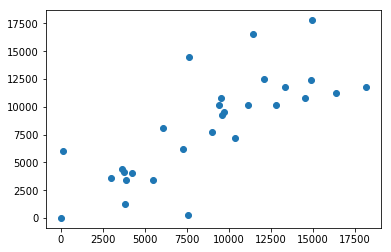

In [57]:
from sklearn.tree import DecisionTreeRegressor

# Decison tree regressor model
dt = DecisionTreeRegressor()

# Decison tree regressor model train
DecisionTreeRegressor.fit(dt,X_train,y_train)

# Decison tree regressor model predict
y_predict_test = dt.predict(X_test)

# Compare predicted Y and real Y 
inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')

MAE 1797 MSE 2316 R2 0.76


(1797, 2316, 0.76)

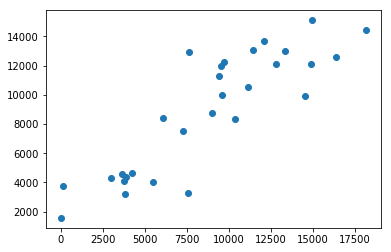

In [58]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')

In [49]:
rfc.feature_importances_

array([0.02621113, 0.0141518 , 0.02234003, 0.02612442, 0.12534293,
       0.01750001, 0.02402904, 0.02556985, 0.06732025, 0.0244008 ,
       0.06661401, 0.01837386, 0.02273176, 0.01976855, 0.0494281 ,
       0.01966076, 0.04407295, 0.01425537, 0.18794725, 0.01919714,
       0.05810607, 0.02248924, 0.01174099, 0.02402174, 0.02914612,
       0.01945582])

In [ ]:
rfc.score(X,y)

In [ ]:
# 1 Nolu Blok
# Internetten bulunan kod blogu
# Random Forest'a gore Feature Importance Hesaplama
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

ScalerType = Scalertype=Scaler_Type_Options[0]
n_sample=len(X)

rfc=RandomForestRegressor(n_estimators=3000)
RandomForestRegressor.fit(rfc,scaled_value_X,scaled_value_y)


predictions = rfc.predict(X_test)
print('MAE',int(metrics.mean_absolute_error(y_test, predictions)),
      'MSE',int(sqrt(metrics.mean_squared_error(y_test, predictions))),
      'R2',int(1000*(metrics.r2_score(y_test, predictions)))/1000
     )


importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(n_feature):
    print("%d. feature %s %d (%f) %f" % (f+1, X_Column_Names[indices[f]], indices[f], importances[indices[f]],std[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations".format(Product,MonthSeries))
plt.bar(range(n_feature), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(n_feature), indices,rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations.png".format(Product,MonthSeries), format='png', dpi=300)

plt.show()

In [ ]:
# 2 Ver Nolu Blok
# Internetten bulunan kod blogu http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Feature Importance Hesaplama
# Burada asıl özellik bir veri seti yaratılıyor make_regression ile. Ve oaradakilere dogru çalışıp çalışmadığı test ediliyor.
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

from sklearn.datasets import make_regression


n_sample=len(X)

number_of_split=100
number_of_row=29

random_state_options = np.arange(0,number_of_split)
y_predict= np.ones((number_of_row, number_of_split))

feature_indices = np.ones((n_feature, number_of_split))
feature_importances=np.ones((n_feature, number_of_split))
feature_indices_score=np.ones((n_feature))
feature_importances_score=np.ones((n_feature))
j=0


# For different split sets Random Forest Regressor runs.

for random_state_i in random_state_options:

    X_train, X_test, y_train, y_test = train_test_split(scaled_value_X,scaled_value_y,test_size=0.2,random_state=random_state_i,stratify=Z['Month'])

    

    rfc=RandomForestRegressor(n_estimators=30)
    RandomForestRegressor.fit(rfc,X_train,y_train)

    y_predict[:,j] = rfc.predict(X_test)
    
    result=inverse_scale_and_graph_Y_predict_and_test (y_predict[:,j],y_test,scaler_y,'NO')
    
    importances = rfc.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

    indices = np.argsort(importances)[::-1]
    feature_indices[:,j]=indices
    feature_importances[:,j]=importances
    j=j+1
    

print ("Features scores:")    
for i in range(n_feature):
    feature_indices_score[i]=0
    feature_importances_score[i]=0
    for j in range(number_of_split):
        
        indice_coeff=feature_indices[i,j]
        importances_coeff=feature_importances[i,j]
        
        feature_indices_score[i]=feature_indices_score[i]+(indice_coeff)
        feature_importances_score[i]=feature_importances_score[i]+(importances_coeff)
        
#        print('feat=',i,'#ofsplit=',j,'tot_indice',feature_indices_score[i],
#              'indice=',indice_coeff,'tot_importan=',feature_importances_score[i],'importan',importances_coeff )

    print( i,X_Column_Names[i])#,feature_indices_score[i],'number_of_split',j+1) #,X_Column_Names[feature_indices[i,j]])
    
scored_feature_indices = np.argsort(feature_indices_score)
scored_feature_importances = np.argsort(feature_importances_score)
    
 
    
    
# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split))
plt.bar(range(n_feature), feature_importances_score[scored_feature_importances][::-1],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_importances[::-1],rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split), format='png', dpi=300)

plt.show()

In [ ]:
# 3 Ver Blok Train Test Split olan
# Internetten bulunan kod blogu
# http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
# Use both RF Importances and R2 Accuracy with different number of splits

from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict
from operator import itemgetter, attrgetter

def getKey(item):
    return item[0]

rf = RandomForestRegressor()


number_of_split=100
number_of_row=29



random_state_options = np.arange(0,number_of_split)
predictions= np.ones((number_of_row, number_of_split))
y_predict= np.ones((number_of_row, number_of_split))

feature_indices = np.ones((n_feature, number_of_split))
feature_importances=np.ones((n_feature, number_of_split))
feature_indices_score=np.ones((n_feature))
feature_importances_score=np.ones((n_feature))

scores = defaultdict(list)
#feature_indices = 
feature_std = np.ones((n_feature, number_of_split))
feature_score=np.zeros((n_feature))

#R2=defaultdict(list)
R2=np.ones(number_of_split)
j=0

sonuc =[]


for random_state_i in random_state_options:

    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=random_state_i,stratify=Z['Month'])

    RandomForestRegressor.fit(rf,X_train, Y_train)    

    y_predict[:,j] = rf.predict(X_test)
    
    acc = int(1000*(r2_score(Y_test, rf.predict(X_test))))/1000
    R2[j] = int(1000*(r2_score(Y_test, rf.predict(X_test))))/1000
        
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)


    feature_importances[:,j]=importances
    feature_indices[:,j]=indices
    feature_std [:,j]=std

    j=j+1

R2_Adj=1-R2
score_coefficient=n_feature*(R2_Adj - np.max(R2_Adj))/-np.ptp(R2_Adj)

    
print ("Features scores:")    
for i in range(n_feature):
    feature_score[i]=0
    feature_indices_score[i]=0
    feature_importances_score[i]=0
    
    for j in range(number_of_split):
        
        indice_coeff=feature_indices[i,j]+1
        importances_coeff=int((feature_importances[i,j]*10000))/10000
        score_coeff=int((score_coefficient[j]+1)*10)/10

        feature_indices_score[i]=feature_indices_score[i]+(indice_coeff)
        feature_importances_score[i]=feature_importances_score[i]+(importances_coeff)

        score=score_coeff*(importances_coeff)
        feature_score[i]=feature_score[i]+score


#    print( feature_score[i],'number_of_split',j+1) #,X_Column_Names[feature_indices[i,j]])
    
scored_feature_indices = (np.argsort(feature_score)[::-1])

for f in range(n_feature):
    print("%d. feature %s %d (%f) %f" % (f+1, X_Column_Names[scored_feature_indices[f]], scored_feature_indices[f], importances[scored_feature_indices[f]],std[scored_feature_indices[f]]))


# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and {} Month Cumulative Feature and Score Importances with {} Different Splits".format(Product,MonthSeries,number_of_split))
plt.bar(range(n_feature), feature_score[scored_feature_indices],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_indices,rotation=90)
plt.xlim([-1, n_feature])

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 12
#plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and {} Month Cumulative Feature and Score Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split), format='png', dpi=300)

plt.show()


        

In [ ]:
# RAndom Forest denemeleri için kullanılan metod

def randomforest(X_train, X_test, y_train, y_test,scaler_y,est,min_leaf,random,feat,max_leaf,min_weight,min_impurity):
    from sklearn.model_selection import cross_val_score   
    from sklearn.model_selection import cross_val_predict
    
    rfc=RandomForestRegressor(n_estimators=est,
                              min_samples_leaf=min_leaf,
                              random_state =random,
                              max_features=feat,
                              max_leaf_nodes=max_leaf,
                              min_weight_fraction_leaf =min_weight,
                              min_impurity_decrease=min_impurity
                             )
   
    RandomForestRegressor.fit(rfc,X_train,y_train)

    y_predict_test = rfc.predict(X_test)
    
    result=inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO')
    
    return result



In [ ]:
randomforest(X_train, X_test, y_train, y_test,scaler_y,200,5,10,20,5,0.1,0.01)

In [ ]:
randomforest(X_train, X_test, y_train, y_test,scaler_y,200,5,10,20,5,0.1,0.01)

In [ ]:
percentile=0
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]

In [ ]:
Scaled_Train_Test_Split=X_Y_scaler_train_test_Split(X_threshold,y,Z)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]


In [ ]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')

In [ ]:
def calıstır_randomforest(X_train, X_test, y_train, y_test,scaler_y,Product,MonthSeries,Scaler_Type):
#ver2    estimator_options = [200, 300, 350, 400,1000]
#ver2    sample_leaf_options = [1,5,10,30,50]
    #sample_leaf_options = [1,5,10,20]
    #random_state_options =[1,10,50,75,200]
#ver2    random_state_options =[10]
    #max_features_option=[3,5,10,20]
    #max_features_option=[10,20,40,54]
#ver2    max_features_option=[10,"log2","sqrt","auto"]
    
    estimation_method='random forest'
#ver3    estimator_options = [200, 300]
#ver3    min_sample_leaf_options = [5,10]
#ver3     random_state_options =[10]
#ver3     max_features_option=[10,"log2","sqrt","auto"]
#ver3    max_leaf_nodes_options=[5] 
#ver3    min_weight_fraction_leaf_options=[0.01,0.1,0.5] 
#ver3    min_impurity_decrease_options =[0.00001,0.01,0.05,1]

    estimator_options = [200]
    min_sample_leaf_options = [5]
    random_state_options =[10]
    max_features_option=[10]#,"log2","sqrt","auto"]
    max_leaf_nodes_options=[5] 
    min_weight_fraction_leaf_options=[0.01] 
    min_impurity_decrease_options =[0.00001,0.01,0.05,1]


    
#    estimator_options = [200, 300, 350, 400,1000]
#    min_sample_leaf_options = [1,5,10,30,50]
#    random_state_options =[10,35,86]
#    max_features_option=[10,"log2","sqrt","auto"]
#    max_leaf_nodes_options=[5,10,35] 
#    min_weight_fraction_leaf_options=[0.01,0.1,0.5] 
#    min_impurity_decrease_options =[0.00001,0.01,0.05,1]    
    
    sonuc = pd.DataFrame(columns='EstMethod Product Scaler MonthSeries EST LEAF FEAT MAX_LEAF MIN_WEIGHT MIN_IMPURITY MAE MSE R2'.split())
    i=0
    results = pd.DataFrame()
    repeats=3
    error_r2 = list()
    for est in estimator_options:

        for min_leaf in min_sample_leaf_options:
        
            for f in range(0, 1):
        
                feat=max_features_option[f]
       
                for random in random_state_options:
                    
                    for max_leaf in max_leaf_nodes_options:
                        
                         for min_weight in min_weight_fraction_leaf_options:
                                
                            for min_impurity in min_impurity_decrease_options:
                                
                              #  for r in range(repeats):
                            
                            
                                    estimate_metric=randomforest(X_train, X_test, y_train, y_test,scaler_y,est,min_leaf,random,feat,
                                                                 max_leaf,min_weight,min_impurity)
                                    MAE=estimate_metric[0]
                                    MSE=estimate_metric[1]
                                    R2=estimate_metric[2]
                                    print(MonthSeries,'esti',est,'leaf',min_leaf,'feature',feat,max_leaf,min_weight,min_impurity,MAE,MSE,R2)
                                    sonuc.loc[i]=[estimation_method,Product,Scaler_Type,MonthSeries,est,min_leaf,feat,max_leaf,min_weight,min_impurity,MAE,MSE,R2]
                                    i=i+1
                                    error_r2.append(R2)
                                    print(error_r2)
                                    
                              #  results[str(min_impurity)]=error_r2
                              #  print(results)    
    return sonuc     

In [ ]:
#Feature Reduction percentile oranına göre oluyor
percentile=25
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
sonuc=pd.DataFrame()
for ScalerType in Scaler_Type_Options:

    Data_Core=readexcel(Product)
    XY=set_Data(Product,Data_Core,MonthSeries)
    y=set_y(Product,XY)
    Z=set_z(Product,XY)
    X=set_X(Product,XY)

    
    X= Xscaler(X,y,ScalerType)
    scaler= MinMaxScaler(feature_range=(0, 1))
    
       
    #Feature Reduction percentile oranına göre oluyor
    X=X.loc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


#    sonuc=pd.concat([sonuc,calıstır_randomforest(Product,MonthSeries,ScalerType)])
#    sonuc=calıstır_randomforest(Product,MonthSeries,ScalerType)

    for MonthSerie in MonthSeries_option:
        XY=set_Data(Product,Data_Core,MonthSeries)
        y=set_y(Product,XY)
        Z=set_z(Product,XY)
        X=set_X(Product,XY)

        values = y.values
        values = values.astype('float32')
        scaler_y= MinMaxScaler(feature_range=(0, 1))

        scaled_value_y = scaler_y.fit_transform(values)
        scaled_value_y = pd.DataFrame(data=scaled_value_y)
        
        
        X= Xscaler(X,y,ScalerType)
    
        X=X.loc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]

    
#        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X,scaled_value_y,test_size=0.2,random_state=42,stratify=Z['Month'])

          sonuc=pd.concat([sonuc,calıstır_randomforest(X_train, X_test, y_train, y_test,scaler_y,Product,MonthSerie,ScalerType)])

max_R2=int((sonuc['R2'].max())*1000)/1000
filename='Out_Random_Predict_Results_{one}_Product{two}_{four}perc_with max{tre}'.format(one=datetime.now().strftime('Date_%m-%d_Time%H_%M'),
                                                                                      two=Product,tre=max_R2,four=percentile)
sonuc.to_excel('{}.xlsx'.format(filename),index = False)      


In [ ]:


#rfc=RandomForestRegressor()
#RandomForestRegressor.fit(rfc,X,y)

est = 200
min_leaf = 5
random =10
feat="log2"
max_leaf=5 
min_weight=0.01 
min_impurity=0.00001


rfc=RandomForestRegressor(n_estimators=est,
                              min_samples_leaf=min_leaf,
                              random_state =random,
                              max_features=feat,
                              max_leaf_nodes=max_leaf,
                              min_weight_fraction_leaf =min_weight,
                              min_impurity_split=min_impurity
                             )

#rfc=RandomForestRegressor()

RandomForestRegressor.fit(rfc,X_train,y_train)

y_predict_test = rfc.predict(X_test)
inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
predictions=inv_y_predict_test

inv_y_test = scaler_y.inverse_transform(y_test)
inv_y_test = inv_y_test[:,0]


print('MAE',int(metrics.mean_absolute_error(inv_y_test, predictions)),
      'MSE',int(sqrt(metrics.mean_squared_error(inv_y_test, predictions))),
      'R2',int(1000*(metrics.r2_score(inv_y_test, predictions)))/1000
     )
plt.scatter(inv_y_test,predictions)


In [ ]:
type(sonuc)

In [ ]:
XY=set_Data(Product,Data_Core,MonthSeries)
y=set_y(Product,XY)
Z=set_z(Product,XY)
X=set_X(Product,XY)

In [ ]:
X= Xscaler(X,y,ScalerType)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
def nn (alph,max_iteration,slv,random,hidden_layer):
    MLP = MLPRegressor(
                              alpha = alph,
                              solver=slv ,
                              max_iter=max_iteration,
                              random_state =random,
                              hidden_layer_sizes=hidden_layer
    )
    MLPRegressor.fit(MLP,X_train,y_train)
    
    predictions = MLP.predict(X_test)
    MAE=int(metrics.mean_absolute_error(y_test, predictions))
    MSE=int(sqrt(metrics.mean_squared_error(y_test, predictions)))
    R2=int(1000*(metrics.r2_score(y_test, predictions)))/1000
    return MAE,MSE,R2 


In [ ]:
 def calıstır_nn(Product,MonthSeries,Scaler_Type):
    estimation_method='nn'
    alpha_options = [0.0001,0.00000001]
    solver_options = ['lbfgs', 'adam' ] # sgd solver cok sapıttı
    max_iteration_options = [50000]#,60000,100000]
    #random_state_options =[1,10,50,75,200]
    #random_state_options =[10,50,90]
    random_state_options =[90]
    hidden_layer_sizes_options=[(30,100,10)]#,(30,30),(100,100),(30,30,30)]

    sonuc = pd.DataFrame(columns='EstMethod Product Scaler MonthSeries alpha max_iteration slv hidden_layer random MAE MSE R2'.split())
    i=0

    for alpha in alpha_options:
    
        for max_iteration in max_iteration_options:

            for slv in solver_options:
        
                for hidden_layer in hidden_layer_sizes_options:
           
                    for random in random_state_options:
                
                        estimate_metric=nn(alpha,max_iteration,slv,random,hidden_layer)
                    
                        MAE=estimate_metric[0]
                        MSE=estimate_metric[1]
                        R2=estimate_metric[2]
                        print('iter:',max_iteration,'slvr:',slv,'random:',random,'layers:',hidden_layer,
                          MAE,MSE,R2)
                        sonuc.loc[i]=[estimation_method,Product,Scaler_Type,MonthSeries,alpha,max_iteration,slv,hidden_layer,random,MAE,MSE,R2]
                        i=i+1
    return sonuc 

In [ ]:
Data_Core=readexcel(Product)
XY=set_Data(Product,Data_Core,MonthSeries)
y=set_y(Product,XY)
Z=set_z(Product,XY)
X=set_X(Product,XY)

values = X.values
values = values.astype('float32')
scaler_X= MinMaxScaler(feature_range=(0, 1))

scaled_value_X = scaler_X.fit_transform(values)
scaled_value_X = pd.DataFrame(data=scaled_value_X[:,:])

values = y.values
values = values.astype('float32')
scaler_y= MinMaxScaler(feature_range=(0, 1))

scaled_value_y = scaler_y.fit_transform(values)
scaled_value_y = pd.DataFrame(data=scaled_value_y)

X_train, X_test, y_train, y_test = train_test_split(scaled_value_X,scaled_value_y,test_size=0.2,random_state=42,stratify=Z['Month'])


#Data_Core=readexcel(Product)
#y=set_y(Product,Data_Core)
#X=set_Data(Product,Data_Core,MonthSeries)

#X=pd.DataFrame(StandardScaler().fit_transform(X,y))
#X= Xscaler(X,y,ScalerType)

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

sonuc=calıstır_nn(Product,MonthSeries,ScalerType)
filename='Out_NN_Prediction_Results_{one}_Product{two}'.format(one=datetime.now().strftime('Date_%m-%d_Time%H_%M'),two=Product)

"""for MonthSerie in MonthSeries_option:
        XY=set_Data(Product,Data_Core,MonthSeries)
        y=set_y(Product,XY)
        Z=set_z(Product,XY)
        X=set_X(Product,XY)

        values = X.values
        values = values.astype('float32')
        scaler_X= MinMaxScaler(feature_range=(0, 1))

        scaled_value_X = scaler_X.fit_transform(values)
        scaled_value_X = pd.DataFrame(data=scaled_value_X[:,:])

        values = y.values
        values = values.astype('float32')
        scaler_y= MinMaxScaler(feature_range=(0, 1))

        scaled_value_y = scaler_y.fit_transform(values)
        scaled_value_y = pd.DataFrame(data=scaled_value_y)
    
        X_train, X_test, y_train, y_test = train_test_split(scaled_value_X,scaled_value_y,test_size=0.2,random_state=42,stratify=Z['Month'])

    
        sonuc=pd.concat([sonuc,calıstır_nn(Product,MonthSerie,ScalerType)])
"""
sonuc.to_excel('{}.xlsx'.format(filename),index = False)

In [ ]:
# Diğer Deneme Calısmaları
from scipy.stats import randint as sp_randint
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# RandomizedSearch ve Grid Search

In [ ]:
   
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": ["auto", "sqrt","log2",None],
              "min_samples_split": sp_randint(2,11),
#              "min_weight_fraction_leaf": sp_randint(0., 0.5),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
#              "warm_start": [True, False],
#              "random_state": sp_randint(2, 20)
             }

In [ ]:
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

In [ ]:
# use a full grid over all parameters
param_grid = {

#              "max_depth": [3, None],
#              "max_features": ["auto", "sqrt","log2",None],
#              "min_samples_split": [2, 3, 10],
#              "min_samples_split": [2],
#              "min_samples_leaf": [1, 3, 10, 20],
#              "bootstrap": [True, False],
#              "criterion": ["gini", "entropy"]
    "n_estimators":[200, 300, 350, 400,1000],
    "min_samples_leaf" :[1,5,10],
    "random_state" : [10],
    "max_features":[1,2]

}



    
#    "n_estimators":[200, 300, 350, 400,1000],
#    "min_samples_leaf" :[1,5,10],
#    "random_state" : [10],
#    "max_features":[3,5,10,20],


# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)